In [3]:
import pandas as pd
df = pd.read_csv('Auto-3.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_Highway,Weight,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6.0,265,23,4451,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4.0,200,31,2778,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4.0,200,29,3230,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6.0,270,28,3575,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6.0,225,24,3880,197


In [5]:
# Display the count
num_rows = len(df)
print(f"Total number of rows: {num_rows}")

Total number of rows: 428


In [7]:
# Display the column (categories)
num_column = df.shape[1]
print(f"Total number of categories: {num_column}")

Total number of categories: 12


In [9]:
df.shape

(428, 12)

In [11]:
# Check data types of each column
print(df.dtypes)

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_Highway      int64
Weight           int64
Length           int64
dtype: object


In [13]:
missing_values = df.isnull().sum()
print(missing_values)

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_Highway    0
Weight         0
Length         0
dtype: int64


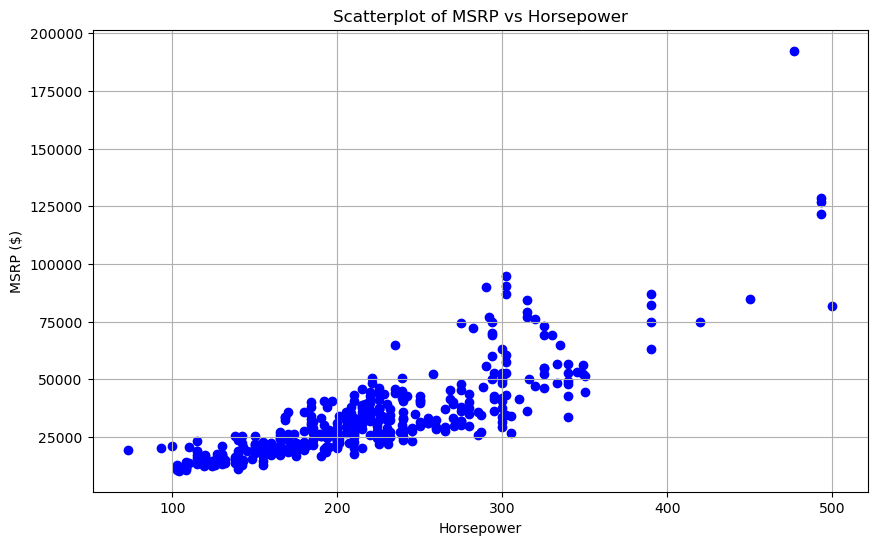

In [15]:
import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Horsepower'], df['MSRP'], color='blue')

# Add titles and labels
plt.title('Scatterplot of MSRP vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MSRP ($)')
plt.grid(True)

# Show the plot
plt.show()

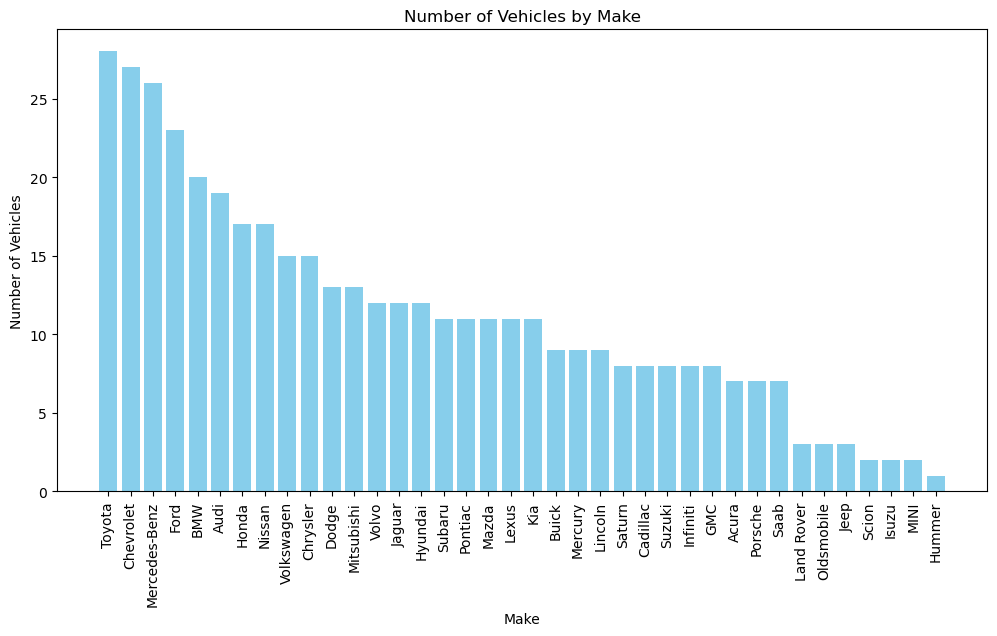

In [11]:
import matplotlib.pyplot as plt2
# Count the number of vehicles for each make
make_counts = df['Make'].value_counts()

# Create a bar plot
plt2.figure(figsize=(12, 6))
plt2.bar(make_counts.index, make_counts.values, color='skyblue')

# Add titles and labels
plt2.title('Number of Vehicles by Make')
plt2.xlabel('Make')
plt2.ylabel('Number of Vehicles')
plt2.xticks(rotation=90)  # Rotate x labels if they overlap

# Show the plot
plt2.show()

In [15]:
count = df['Make'].str.count('Toyota').sum()
print(f"Toyota number of vehicles:{count}")

Toyota number of vehicles:28


#Toyota has the greatest number of vehicles based on the bar plot

In [30]:
# Normalize the Horsepower column
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Horsepower' column
df['Horsepower_Normalized'] = scaler.fit_transform(df[['Horsepower']])

# Print the entire DataFrame
print(df)

      Make                    Model   Type  Origin DriveTrain   MSRP  \
0    Acura                      MDX    SUV    Asia        All  36945   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755   
..     ...                      ...    ...     ...        ...    ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210   
426  Volvo                      V40  Wagon  Europe      Front  26135   
427  Volvo                     XC70  Wagon  Europe        All  35145   

     EngineSize  Cylinders  Horsepower  MPG_Highway  Weight  Length  \
0           3.5        6.0         265           23    4451     

In [32]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the 'Horsepower' column
df['Horsepower_Standardized'] = scaler.fit_transform(df[['Horsepower']])

# Print the entire DataFrame
print(df)

      Make                    Model   Type  Origin DriveTrain   MSRP  \
0    Acura                      MDX    SUV    Asia        All  36945   
1    Acura           RSX Type S 2dr  Sedan    Asia      Front  23820   
2    Acura                  TSX 4dr  Sedan    Asia      Front  26990   
3    Acura                   TL 4dr  Sedan    Asia      Front  33195   
4    Acura               3.5 RL 4dr  Sedan    Asia      Front  43755   
..     ...                      ...    ...     ...        ...    ...   
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  40565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  42565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  45210   
426  Volvo                      V40  Wagon  Europe      Front  26135   
427  Volvo                     XC70  Wagon  Europe        All  35145   

     EngineSize  Cylinders  Horsepower  MPG_Highway  Weight  Length  \
0           3.5        6.0         265           23    4451     

In [34]:
# Print specific columns
columns_to_print = ['Horsepower','Horsepower_Normalized', 'Horsepower_Standardized']
print(df[columns_to_print])

     Horsepower  Horsepower_Normalized  Horsepower_Standardized
0           265               0.449649                 0.684503
1           200               0.297424                -0.221395
2           200               0.297424                -0.221395
3           270               0.461358                 0.754187
4           225               0.355972                 0.127028
..          ...                    ...                      ...
423         197               0.290398                -0.263205
424         242               0.395785                 0.363955
425         268               0.456674                 0.726313
426         170               0.227166                -0.639501
427         208               0.316159                -0.109899

[428 rows x 3 columns]


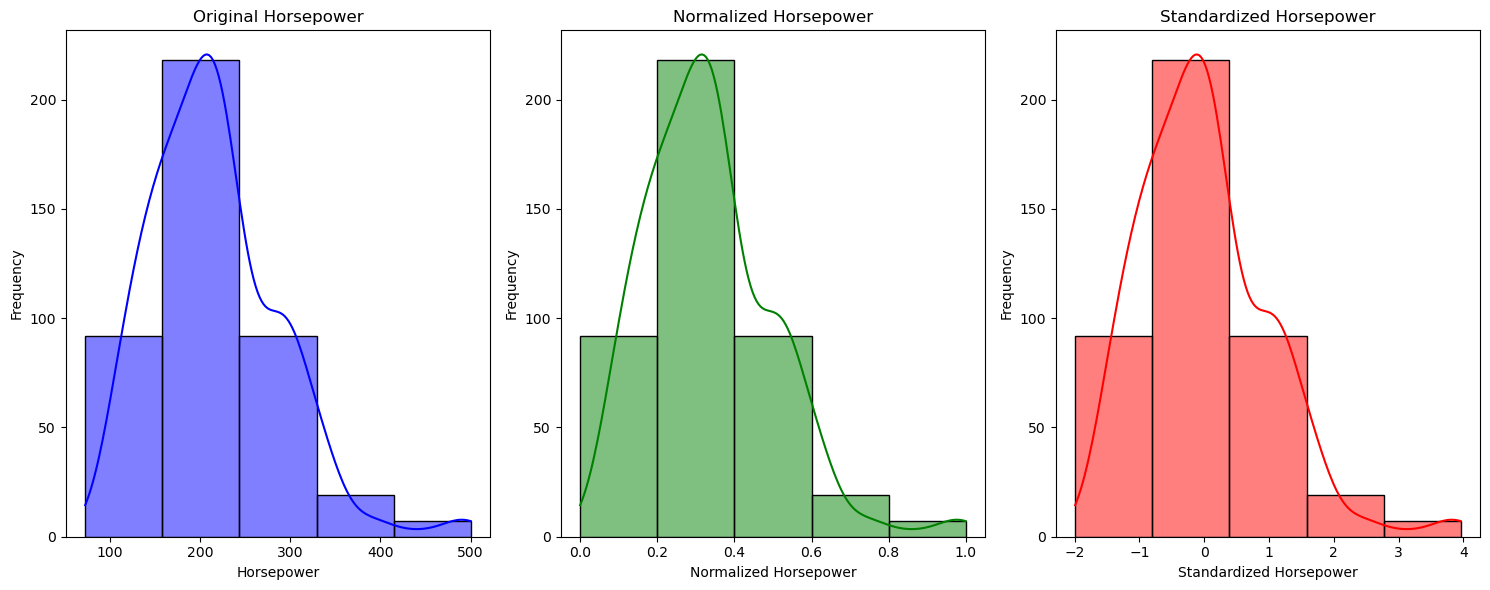

In [38]:
import seaborn as sns
# Create plots
plt.figure(figsize=(15, 6))

# Original Horsepower
plt.subplot(1, 3, 1)
sns.histplot(df['Horsepower'], kde=True, color='blue', bins=5)
plt.title('Original Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

# Normalized Horsepower
plt.subplot(1, 3, 2)
sns.histplot(df['Horsepower_Normalized'], kde=True, color='green', bins=5)
plt.title('Normalized Horsepower')
plt.xlabel('Normalized Horsepower')
plt.ylabel('Frequency')

# Standardized Horsepower
plt.subplot(1, 3, 3)
sns.histplot(df['Horsepower_Standardized'], kde=True, color='red', bins=5)
plt.title('Standardized Horsepower')
plt.xlabel('Standardized Horsepower')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

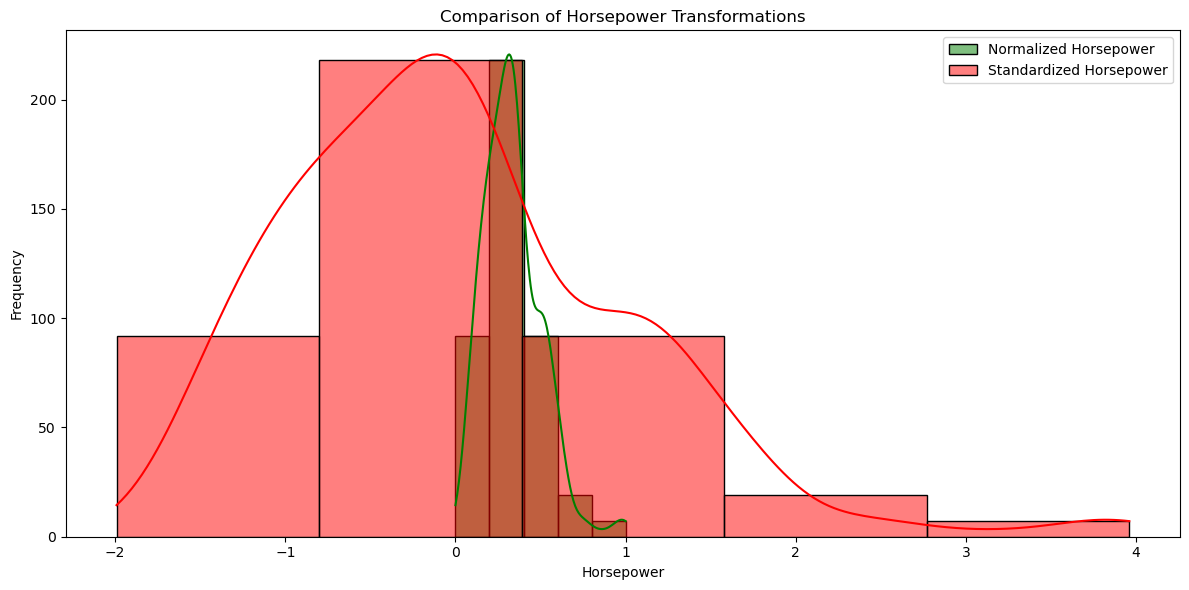

In [42]:
# Create a combined plot
plt.figure(figsize=(12, 6))

# Plot original Horsepower
#sns.histplot(df['Horsepower'], kde=True, color='blue', label='Original Horsepower', bins=5, alpha=0.5)

# Plot normalized Horsepower
sns.histplot(df['Horsepower_Normalized'], kde=True, color='green', label='Normalized Horsepower', bins=5, alpha=0.5)

# Plot standardized Horsepower
sns.histplot(df['Horsepower_Standardized'], kde=True, color='red', label='Standardized Horsepower', bins=5, alpha=0.5)

# Add titles and labels
plt.title('Comparison of Horsepower Transformations')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()